In [3]:
from numpy.linalg import svd
import numpy as np

In [16]:
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)


In [21]:
X_centered = X - X.mean()
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]


# 

In [26]:
Vt

array([[-0.97347709, -0.17854955, -0.1430469 ],
       [-0.20220765,  0.9639639 ,  0.17287471],
       [-0.10702534, -0.19721475,  0.97450086]])

In [29]:
c1

array([-0.97347709, -0.17854955, -0.1430469 ])

array([-0.97347709, -0.17854955, -0.1430469 ])

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [57]:
pca.components_

array([[-0.9727792 , -0.18365798, -0.14131656],
       [ 0.21195747, -0.95167614, -0.22223085]])

In [58]:
pca.explained_variance_ratio_

array([0.86600418, 0.12327224])

In [59]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2)


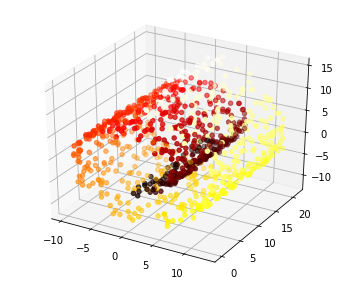

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=t, cmap=plt.cm.hot )

In [66]:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)

In [71]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [148]:
pca = PCA(n_components=0.90)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [149]:
np.sum(pca.explained_variance_ratio_)

0.9006747462076099

In [150]:
pca.n_components_

87

In [132]:
import matplotlib as mpl

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Recovered')

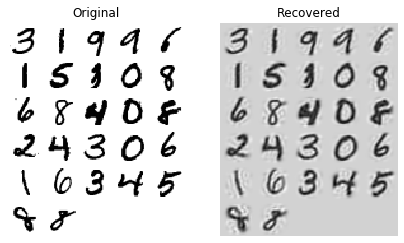

In [151]:

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2000])
plt.title("Original")

plt.subplot(122)
plot_digits(X_recovered[::2000])
plt.title("Recovered")



In [166]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=10)

In [167]:
import time
from sklearn.metrics import accuracy_score

t1 = time.time()
rnd_clf.fit(X_train, y_train)
t2 = time.time()

print("no PCA training: ", t2 - t1)
print("accuracy_score: ", rnd_clf.score(X_test, y_test))

no PCA:  4.103863716125488
accuracy_score:  0.9453142857142857


In [171]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
X_train_reduced = pca.fit_transform(X_train)

rnd_clf2 = RandomForestClassifier(n_estimators=10)

t1 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t2 = time.time()

print("PCA training: ", t2 - t1)
print("accuracy_score: ", rnd_clf2.score(pca.transform(X_test), y_test))

PCA training:  7.2915120124816895
accuracy_score:  0.8881142857142857


In [173]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs")
t1 = time.time()
log_clf.fit(X_train, y_train)
t2 = time.time()

print("Softmax training: ", t2 - t1)
print("accuracy_score: ", log_clf.score(X_test, y_test))
# print("accuracy_score: ", accuracy_score(y_test, log_clf.predict(X_test)))

Softmax training:  9.887406587600708
accuracy_score:  0.9213142857142858


C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [175]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs")
t1 = time.time()
log_clf.fit(X_train_reduced, y_train)
t2 = time.time()

print("Softmax reduced training: ", t2 - t1)
print("accuracy_score: ", log_clf.score(pca.transform(X_test), y_test))
# print("accuracy_score: ", accuracy_score(y_test, log_clf.predict(X_test)))

Softmax reduced training:  3.9760525226593018
accuracy_score:  0.9180571428571429


C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [179]:
m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist["data"][idx]
y = mnist["target"][idx]


In [180]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(X)

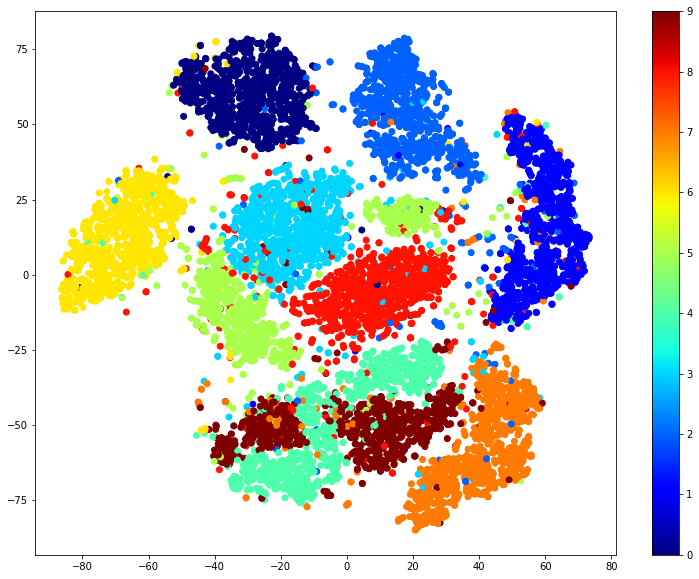

In [184]:
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.colorbar()
plt.show()

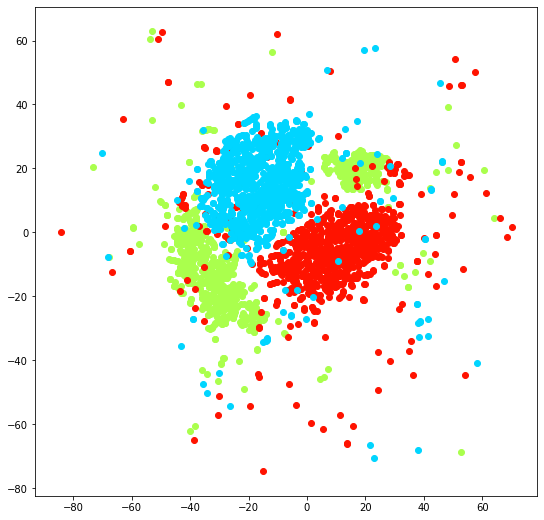

In [192]:
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (5,8,3):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit/9)])
    
plt.show()

In [198]:
idx = (y == 5) | (y == 8) | (y == 3)
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

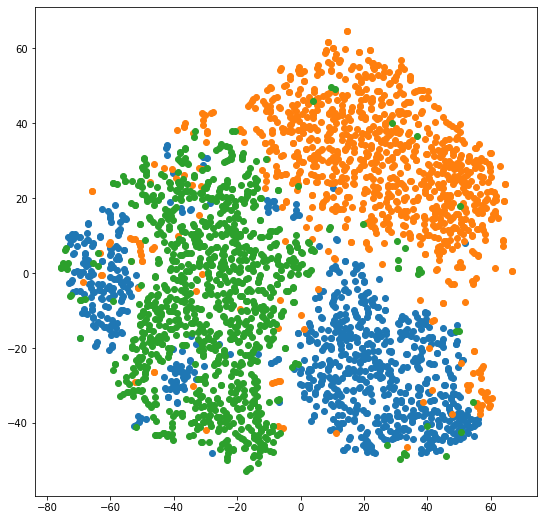

In [199]:
plt.figure(figsize=(9,9))
for digit in (5,8,3):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], cmap="jet")

In [212]:

from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    #plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

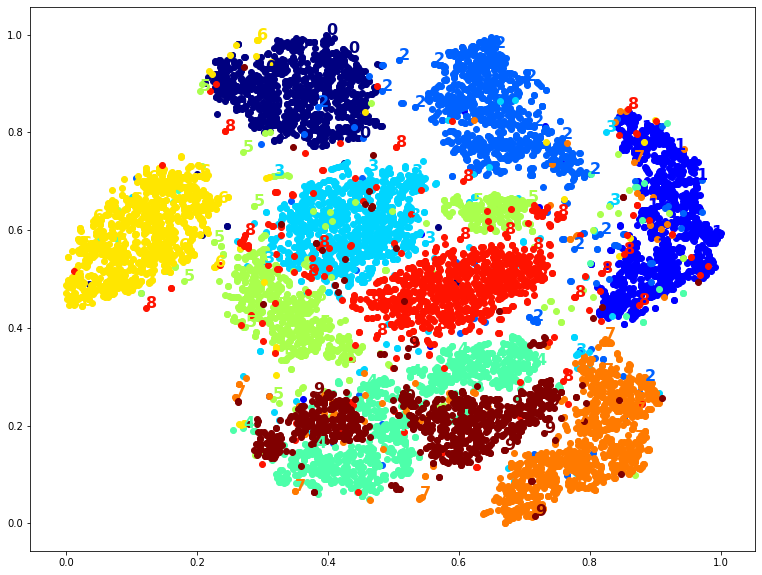

In [213]:
plot_digits(X_reduced, y)

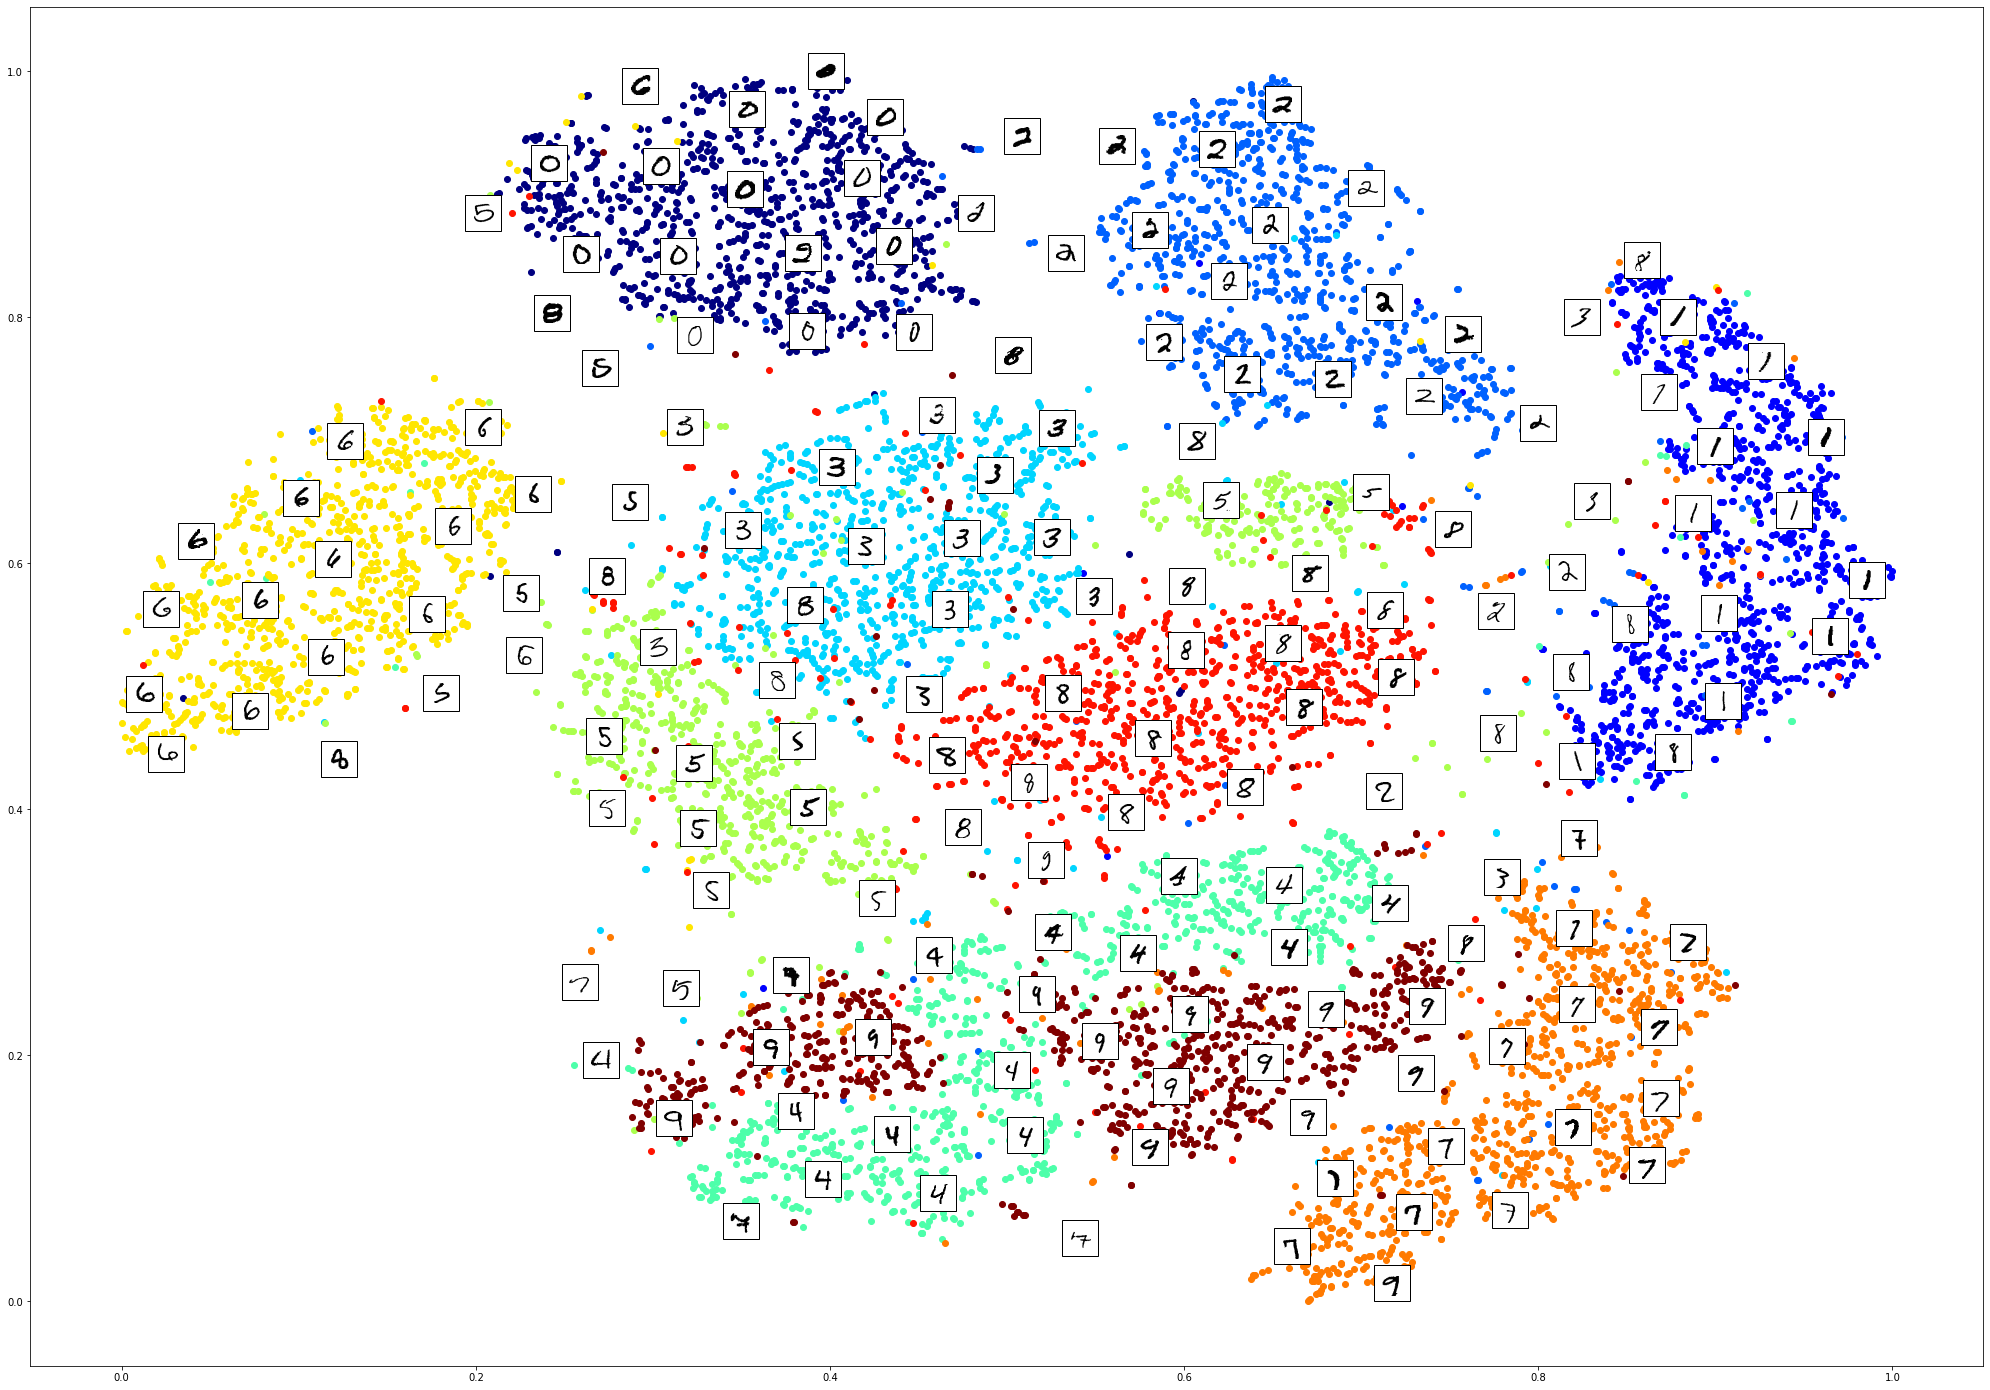

In [214]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

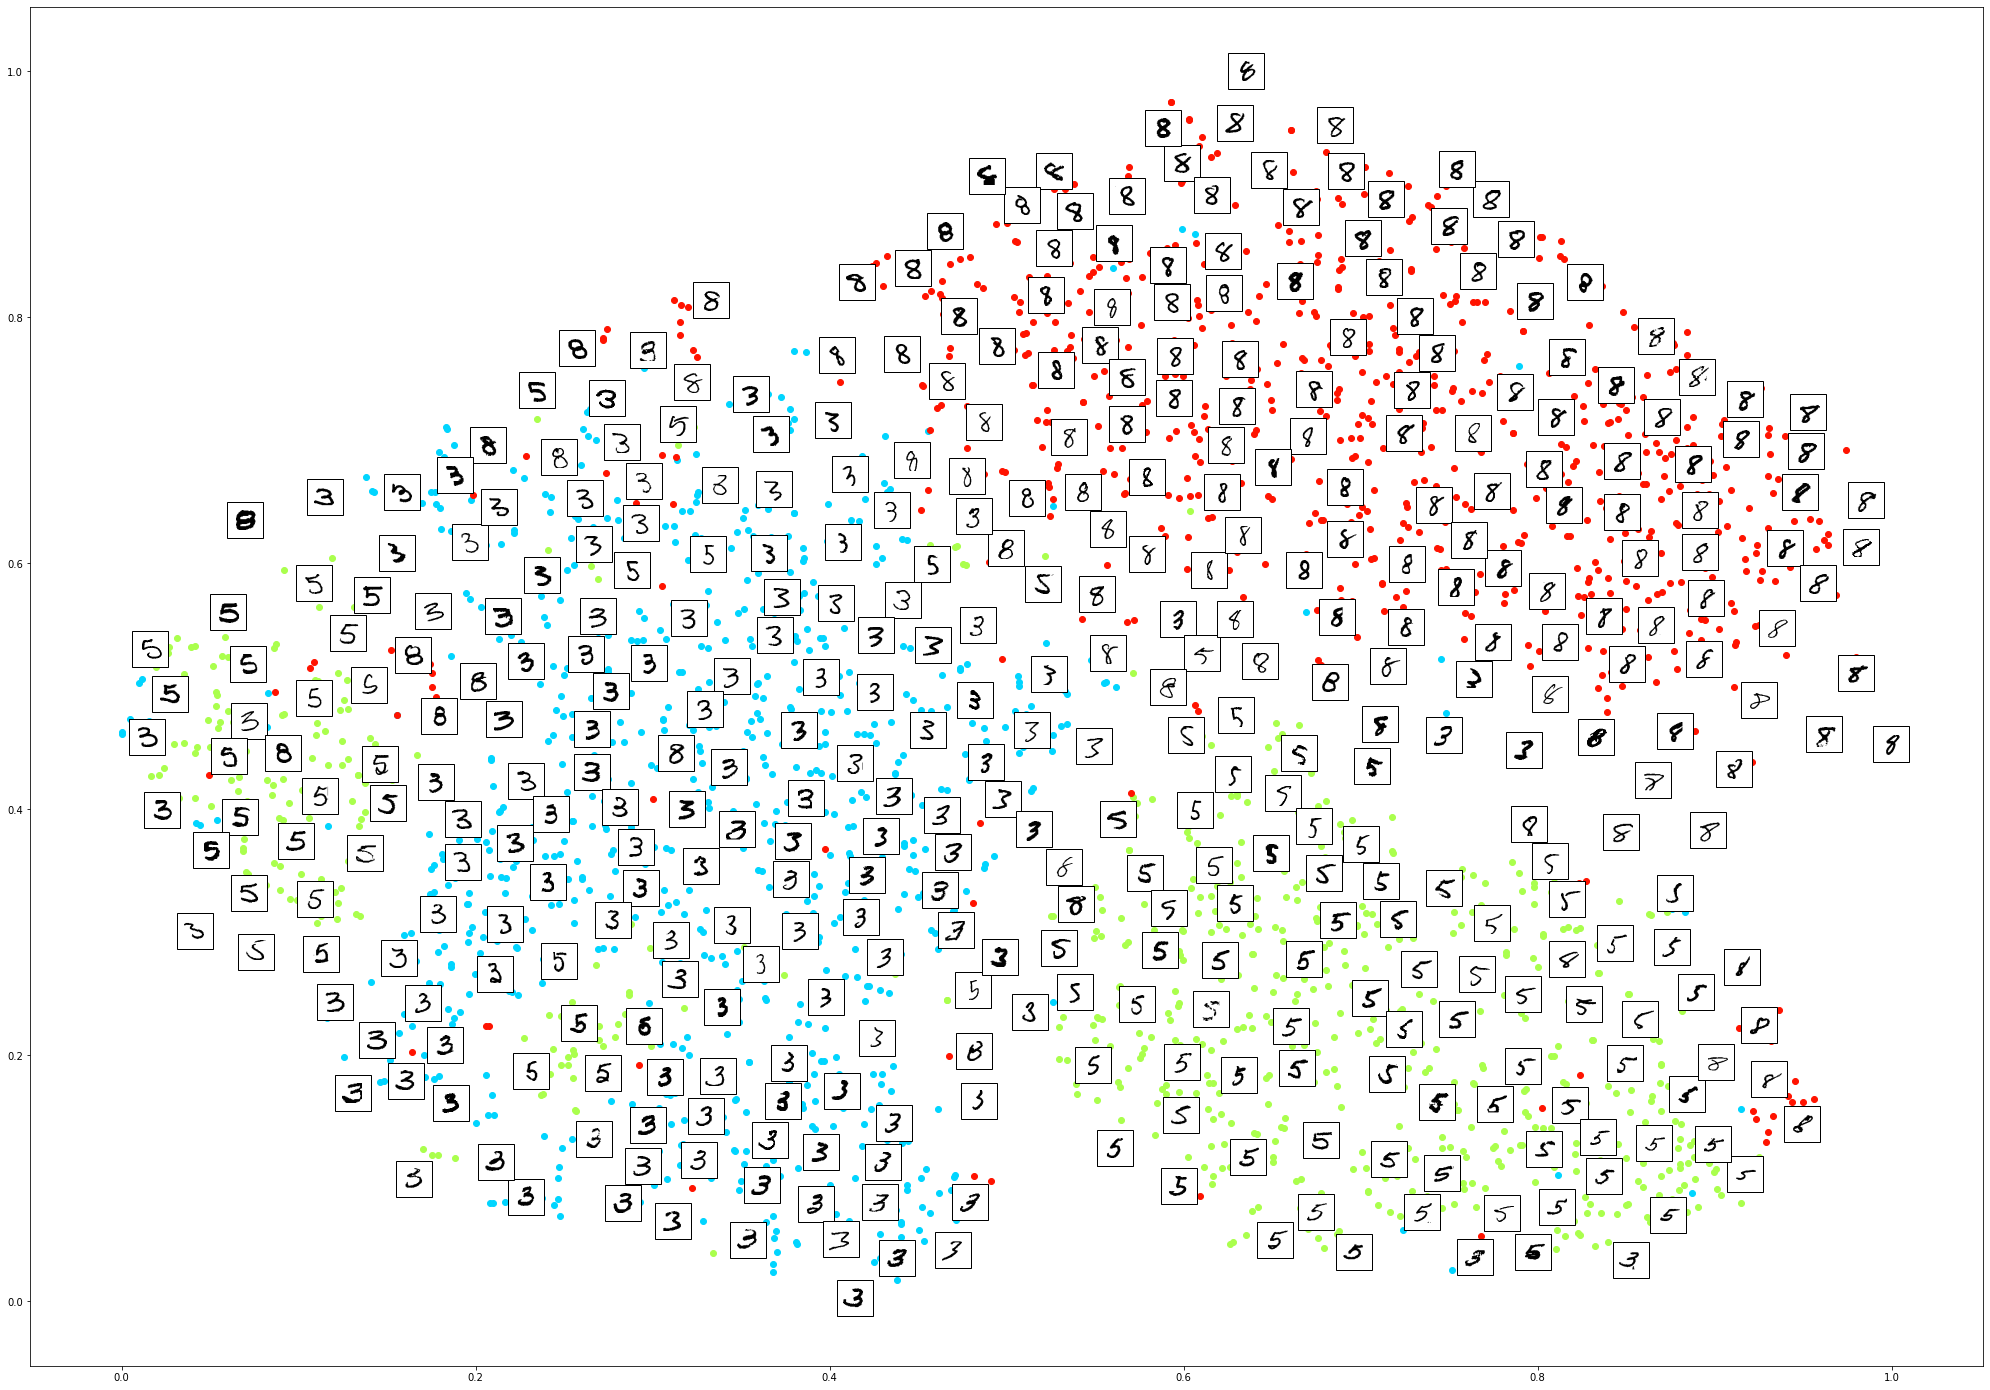

In [222]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(35, 25), min_distance=0.03)

PCA trainig duration:  0.2359616756439209


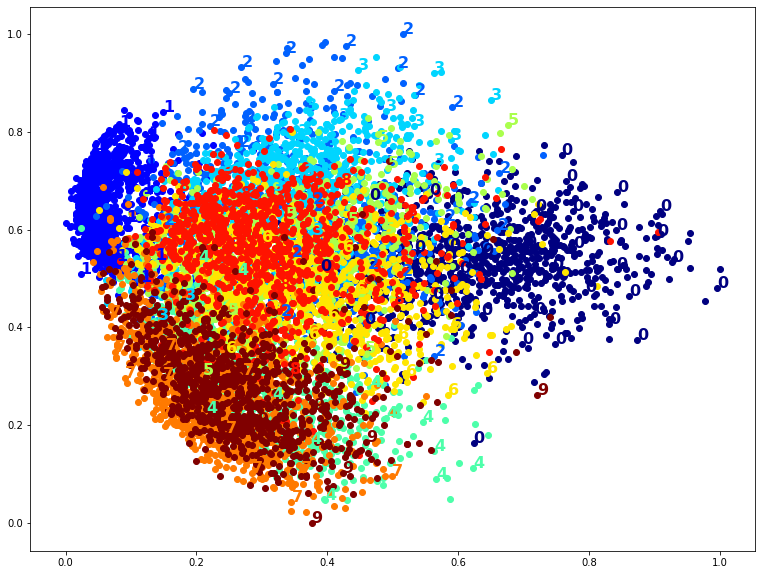

In [224]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
t1 = time.time()
X_pca_reduced = pca.fit_transform(X)
t2 = time.time()

print("PCA trainig duration: ", t2 - t1)
plot_digits(X_pca_reduced, y)


LLE trainig duration:  143.8617081642151


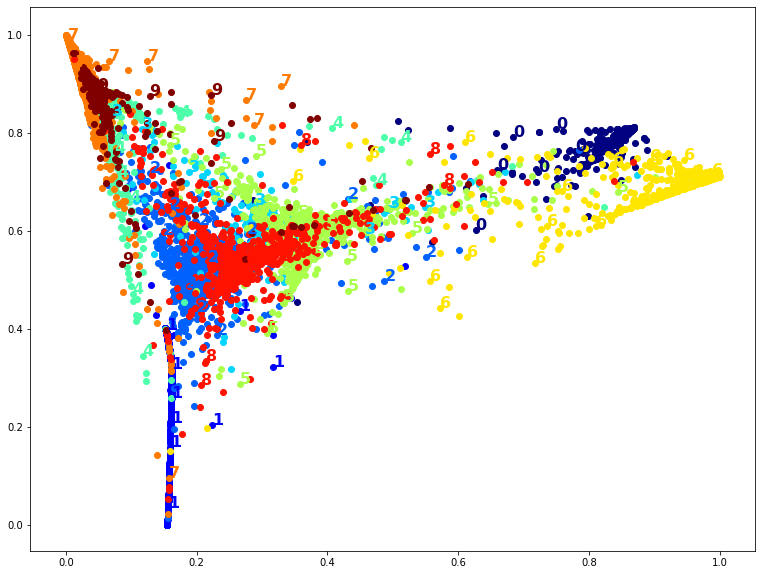

In [225]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2)
t1 = time.time()
X_lle_reduced = lle.fit_transform(X)
t2 = time.time()

print("LLE trainig duration: ", t2 - t1)
plot_digits(X_lle_reduced, y)


PCA + LLE trainig duration:  38.22681379318237


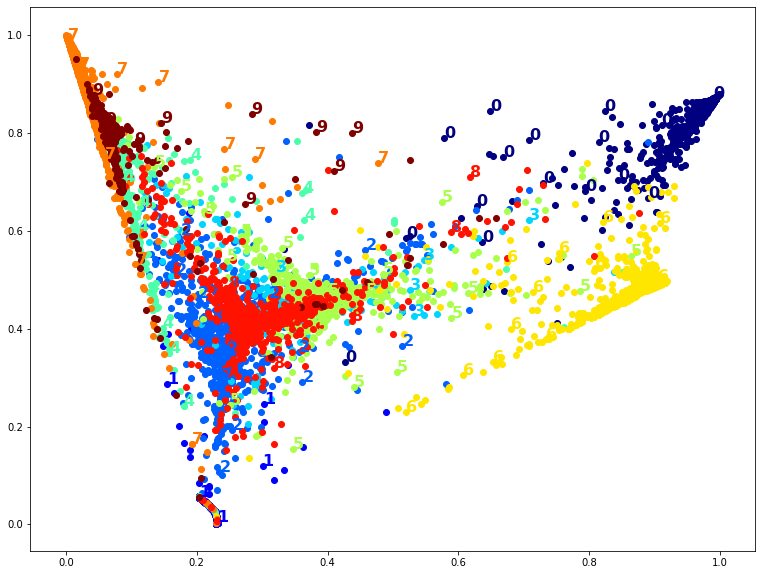

In [227]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95)),
    ("lle", LocallyLinearEmbedding(n_components=2))
])

t1 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t2 = time.time()

print("PCA + LLE trainig duration: ", t2 - t1)
plot_digits(X_pca_lle_reduced, y)


In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
t1 = time.time()
X_mds_reduced = mds.fit_transform(X)
t2 = time.time()

print("MDS trainig duration: ", t2 - t1)
plot_digits(X_mds_reduced, y)


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
t1 = time.time()
X_tsne_reduced = tsne.fit_transform(X)
t2 = time.time()

print("TSNE trainig duration: ", t2 - t1)
plot_digits(X_tsne_reduced, y)


In [ ]:
pca_tsne_pipeline = Pipeline([
    ("pca", PCA(n_components=0.95)),
    ("tsne", TSNE(n_components = 2))
])

pca_tsne = psa_tsne_pipeline()
t1 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t2 = time.time()

print("PCA + t-SNE trainig duration: ", t2 - t1)
plot_digits(X_pca_tsne_reduced, y)
